# Player Analysis

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Cleaning and Exploration

In [2]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [3]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [4]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 24)

In [5]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,2,0,0,0,0,2,2,NaN,NaN


### Taking in consideration only SRH VS RR matches

In [6]:
SRH_RR = matches[np.logical_or(np.logical_and(matches['team1']=='Rajasthan Royals',matches['team2']=='Sunrisers Hyderabad'),
                            np.logical_and(matches['team2']=='Rajasthan Royals',matches['team1']=='Sunrisers Hyderabad'))]

In [7]:
SRH_RR.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
98439,416,2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,Rajasthan Royals,1,Sunrisers Hyderabad,Rajasthan Royals,...,A Chandila,0,0,0,0,0,0,0,NaN,NaN
98440,416,2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,Rajasthan Royals,1,Sunrisers Hyderabad,Rajasthan Royals,...,A Chandila,0,0,0,0,0,0,0,NaN,NaN
98441,416,2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,Rajasthan Royals,1,Sunrisers Hyderabad,Rajasthan Royals,...,A Chandila,0,0,0,0,2,0,2,NaN,NaN
98442,416,2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,Rajasthan Royals,1,Sunrisers Hyderabad,Rajasthan Royals,...,A Chandila,0,0,0,0,0,0,0,NaN,NaN
98443,416,2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,Rajasthan Royals,1,Sunrisers Hyderabad,Rajasthan Royals,...,A Chandila,0,0,0,0,0,0,0,PA Reddy,caught


In [8]:
SRH_RR.match_id.nunique()

11

## Balls Rashid will take for his first wicket

In [9]:
rashid = SRH_RR[SRH_RR["bowler"]=="Rashid Khan"]
rashid = rashid[rashid["dismissal_kind"]!="run out"]

In [10]:
rashid_dismissal = rashid.groupby(["match_id"]).agg({"ball":"count","player_dismissed":"count"})

rashid_dismissal.columns = ["total ball","wicket taken"]

print("Rashid's Performance :")
rashid_dismissal

Rashid's Performance :


,total ball,wicket taken
match_id,,
7897,24,1
7921,24,1
11144,24,1
11336,24,1


- Balls Rashid will take for his 1st wicket :

In [11]:
batsman = rashid.batsman.unique()
a =[]
for value in rashid.groupby("match_id"):
    count = 0
    d = list(value[1]["player_dismissed"])
    #print(d)
    for i in d:
        count = count+1
        if(i in batsman):
            a.append(count)
a            

[20, 12, 2, 13]

In [12]:
rashid_dismissal["balls for 1st wicket"] = a

rashid_dismissal

,total ball,wicket taken,balls for 1st wicket
match_id,,,
7897,24,1,20
7921,24,1,12
11144,24,1,2
11336,24,1,13


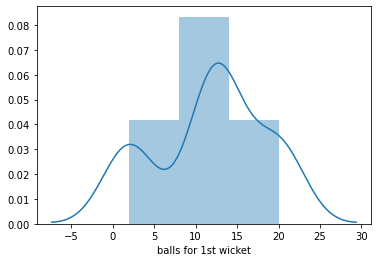

In [13]:
sns.distplot(rashid_dismissal["balls for 1st wicket"])

In [14]:
print("Average balls taken by rashid for his first wicket :{}".format(round(rashid_dismissal["balls for 1st wicket"].mean())))

Average balls taken by rashid for his first wicket :12


## David Warner out type

- SRH VS RR matches

In [15]:
warner = SRH_RR[(SRH_RR["batting_team"]=="Sunrisers Hyderabad") & (SRH_RR["batsman"]=="DA Warner")]

warner.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
109138,461,2014,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,1,Sunrisers Hyderabad,Rajasthan Royals,...,DS Kulkarni,0,0,0,0,0,0,0,NaN,NaN
109144,461,2014,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,1,Sunrisers Hyderabad,Rajasthan Royals,...,KW Richardson,0,0,0,0,0,0,0,NaN,NaN
109145,461,2014,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,1,Sunrisers Hyderabad,Rajasthan Royals,...,KW Richardson,0,0,0,0,0,0,0,NaN,NaN
109147,461,2014,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,1,Sunrisers Hyderabad,Rajasthan Royals,...,JP Faulkner,0,0,0,0,2,0,2,NaN,NaN
109148,461,2014,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,1,Sunrisers Hyderabad,Rajasthan Royals,...,JP Faulkner,0,0,0,0,1,0,1,NaN,NaN


In [16]:
warner_dismiss = pd.DataFrame(warner.groupby(["match_id","batsman","dismissal_kind"])["dismissal_kind"].count())

warner_dismiss.columns = ["count"]

warner_dismiss.reset_index(inplace = True)

warner_dismiss

,match_id,batsman,dismissal_kind,count
0,461,DA Warner,caught,1
1,487,DA Warner,stumped,1
2,558,DA Warner,caught,1
3,11144,DA Warner,caught,1
4,11336,DA Warner,caught,1


Dismisal type count for Warner in RR VS SRH matches :


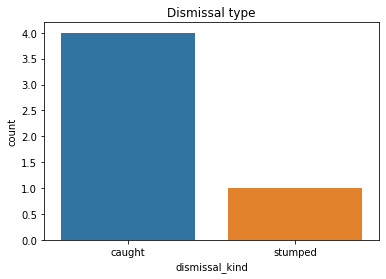

In [17]:
sns.countplot(warner_dismiss["dismissal_kind"])
plt.title("Dismissal type")
print("Dismisal type count for Warner in RR VS SRH matches :")

- Overall

In [18]:
warner_overall = matches[(matches["batting_team"]=="Sunrisers Hyderabad") & (matches["batsman"]=="DA Warner")]
warner_overall.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,2,0,0,0,0,2,2,NaN,NaN


In [19]:
warner_overall.match_id.nunique()

71

In [20]:
warner_dismiss_overall = pd.DataFrame(warner_overall.groupby(["match_id","bowler","batsman","dismissal_kind"])["dismissal_kind"].count())

warner_dismiss_overall.columns = ["count"]

warner_dismiss_overall.reset_index(inplace = True)

warner_dismiss_overall.head()

,match_id,bowler,batsman,dismissal_kind,count
0,1,A Choudhary,DA Warner,caught,1
1,10,Harbhajan Singh,DA Warner,caught,1
2,14,Kuldeep Yadav,DA Warner,caught,1
3,21,CH Morris,DA Warner,caught,1
4,25,JD Unadkat,DA Warner,bowled,1


Dismisal type count for Warner overall :


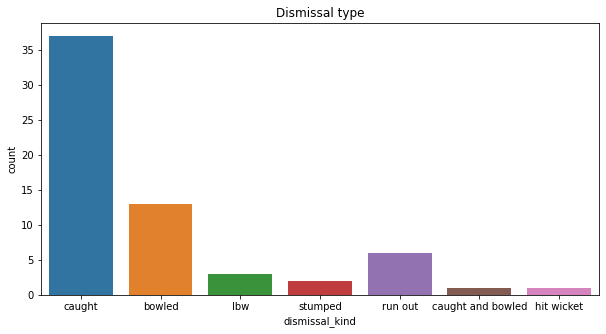

In [21]:
plt.figure(figsize = (10,5))
sns.countplot(warner_dismiss_overall["dismissal_kind"])
plt.title("Dismissal type")
print("Dismisal type count for Warner overall :")

- Bowler type to which Warner generally gets dismissed to :

In [22]:
seam = ['A Choudhary','CH Morris','JD Unadkat','CR Woakes','Mohammed Shami','BA Stokes','MJ McClenaghan','R Bhatia','L Balaji','BW Hilfenhaus',
       'CJ Anderson','MA Starc','Sandeep Sharma','UT Yadav','VR Aaron','JW Hastings','M Morkel','IC Pandey','SL Malinga','SR Watson',
       'NM Coulter-Nile','BE Hendricks','AB Dinda','DS Kulkarni','RP Singh','Anureet Singh','CR Brathwaite','S Aravind','AD Russell',
       'Mohammed Siraj','K Rabada','A Joseph','DL Chahar','P Raj','O Thomas']

spin = ['Harbhajan Singh','Kuldeep Yadav','GJ Maxwell','PP Chawla','PV Tambe','M Muralitharan','JP Duminy','YS Chahal','AR Patel','SK Raina',
       'T Shamsi','J Yadav','A Mishra','SP Narine','R Ashwin',]

In [23]:
def classify(df) :
    if df["bowler"] in seam:
        return "seam"
    if df["bowler"] in spin:
        return "spin"

In [24]:
warner_dismiss_overall["type"] = warner_dismiss_overall.apply(classify , axis = 1)

warner_dismiss_overall

,match_id,bowler,batsman,dismissal_kind,count,type
0,1,A Choudhary,DA Warner,caught,1,seam
1,10,Harbhajan Singh,DA Warner,caught,1,spin
2,14,Kuldeep Yadav,DA Warner,caught,1,spin
3,21,CH Morris,DA Warner,caught,1,seam
4,25,JD Unadkat,DA Warner,bowled,1,seam
...,...,...,...,...,...,...
58,11324,DL Chahar,DA Warner,caught,1,seam
59,11329,P Raj,DA Warner,bowled,1,seam
60,11332,Harbhajan Singh,DA Warner,stumped,1,spin
61,11336,O Thomas,DA Warner,caught,1,seam


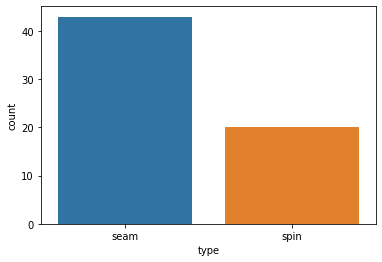

In [25]:
sns.countplot(warner_dismiss_overall["type"])

From all the above analysis we can see that Warner generally gets trapped by seamers and most of the time he had been out by either getting caught or bowled.

So, we can predict that there are more chances of Warner to be caught out or bowled in Today's match also if everthing went statistically.

## Batsman who can score more runs for RR today

In [26]:
rr = SRH_RR[SRH_RR["batting_team"]=="Rajasthan Royals"]
rr.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
98568,416,2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,Rajasthan Royals,2,Rajasthan Royals,Sunrisers Hyderabad,...,DW Steyn,0,0,0,0,0,0,0,NaN,NaN
98569,416,2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,Rajasthan Royals,2,Rajasthan Royals,Sunrisers Hyderabad,...,DW Steyn,0,0,0,0,1,0,1,NaN,NaN
98570,416,2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,Rajasthan Royals,2,Rajasthan Royals,Sunrisers Hyderabad,...,DW Steyn,0,0,0,0,0,0,0,NaN,NaN
98571,416,2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,Rajasthan Royals,2,Rajasthan Royals,Sunrisers Hyderabad,...,DW Steyn,0,0,0,0,0,0,0,NaN,NaN
98572,416,2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,Rajasthan Royals,2,Rajasthan Royals,Sunrisers Hyderabad,...,DW Steyn,0,0,0,0,0,0,0,NaN,NaN


In [27]:
rr_runs = pd.DataFrame(rr.groupby(['match_id'])["total_runs"].sum())
rr_runs.reset_index(inplace = True)

rr_runs

,match_id,total_runs
0,416,146
1,449,113
2,455,135
3,461,135
4,487,102
5,529,131
6,558,194
7,7897,133
8,7921,141
9,11144,203


Each team generally consists of 6-7 regular batsman(including all-rounders also) . So taking that in consideration and also RR's present lineup we can say that in most of the cases they play with 6-7 batsman.

So, to get an idea of who will score more runs for RR we need to estimate the average contribution of each batsman in RR's total run in each match.

In [28]:
each_player_contribution = pd.DataFrame(rr_runs["total_runs"]/7)

each_player_contribution.columns = ['contribution of each']

print("On an average contribution of batsman in RR's score :")
each_player_contribution

On an average contribution of batsman in RR's score :


,contribution of each
0,20.857143
1,16.142857
2,19.285714
3,19.285714
4,14.571429
5,18.714286
6,27.714286
7,19.000000
8,20.142857
9,29.000000


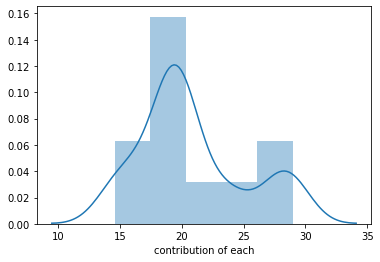

In [29]:
sns.distplot(each_player_contribution["contribution of each"])

In [30]:
print("Average contribution of each batsman(regular) in RR's inning against SRH :{}%".format(round(each_player_contribution["contribution of each"].mean())))

Average contribution of each batsman(regular) in RR's inning against SRH :21%


- Steven Smith

In [31]:
smith = rr[rr["batsman"]=="SPD Smith"]

In [32]:
smith_runs = pd.DataFrame(smith.groupby("match_id")["batsman_runs"].sum())

smith_runs.reset_index(inplace = True)

smith_runs.columns = ["match_id","smith runs"]

smith_runs

,match_id,smith runs
0,487,22
1,529,13
2,558,68
3,11336,22


In [33]:
final11 = pd.merge(smith_runs, rr_runs, on='match_id', how='inner')

final11

,match_id,smith runs,total_runs
0,487,22,102
1,529,13,131
2,558,68,194
3,11336,22,167


In [34]:
final11["contribution"] = round((final11["smith runs"]/final11["total_runs"]) * 100)

final11

,match_id,smith runs,total_runs,contribution
0,487,22,102,22.0
1,529,13,131,10.0
2,558,68,194,35.0
3,11336,22,167,13.0


In [35]:
print("Average contribution of Smith in RR's inning against SRH :{}%".format(round(final11["contribution"].mean())))

Average contribution of Smith in RR's inning against SRH :20%


- Sanju Samson

In [36]:
samson = rr[rr["batsman"]=="SV Samson"]

In [37]:
samson_runs = pd.DataFrame(samson.groupby("match_id")["batsman_runs"].sum())

samson_runs.reset_index(inplace = True)

samson_runs.columns = ["match_id","samson runs"]

samson_runs

,match_id,samson runs
0,449,5
1,455,10
2,461,3
3,487,16
4,529,26
5,558,21
6,7897,51
7,7921,40
8,11144,106
9,11336,53


In [38]:
final12 = pd.merge(samson_runs, rr_runs, on='match_id', how='inner')

final12

,match_id,samson runs,total_runs
0,449,5,113
1,455,10,135
2,461,3,135
3,487,16,102
4,529,26,131
5,558,21,194
6,7897,51,133
7,7921,40,141
8,11144,106,203
9,11336,53,167


In [39]:
final12["contribution"] = round((final12["samson runs"]/final12["total_runs"]) * 100)

final12

,match_id,samson runs,total_runs,contribution
0,449,5,113,4.0
1,455,10,135,7.0
2,461,3,135,2.0
3,487,16,102,16.0
4,529,26,131,20.0
5,558,21,194,11.0
6,7897,51,133,38.0
7,7921,40,141,28.0
8,11144,106,203,52.0
9,11336,53,167,32.0


In [40]:
print("Average contribution of Samson in RR's inning against SRH :{}%".format(round(final12["contribution"].mean())))

Average contribution of Samson in RR's inning against SRH :21%


- Joss Butler

In [41]:
buttler = rr[rr["batsman"]=="JC Buttler"]

In [42]:
buttler_runs = pd.DataFrame(buttler.groupby("match_id")["batsman_runs"].sum())

buttler_runs.reset_index(inplace = True)

buttler_runs.columns = ["match_id","buttler runs"]

buttler_runs

,match_id,buttler runs
0,7897,6
1,7921,10
2,11144,6


In [43]:
final13 = pd.merge(buttler_runs, rr_runs, on='match_id', how='inner')

final13

,match_id,buttler runs,total_runs
0,7897,6,133
1,7921,10,141
2,11144,6,203


In [44]:
final13["contribution"] = round((final13["buttler runs"]/final13["total_runs"]) * 100)

final13

,match_id,buttler runs,total_runs,contribution
0,7897,6,133,5.0
1,7921,10,141,7.0
2,11144,6,203,3.0


In [45]:
print("Average contribution of Buttler in RR's inning against SRH :{}%".format(round(final13["contribution"].mean())))

Average contribution of Buttler in RR's inning against SRH :5%


So, from all the above analysis of player's contribution in RR's total we found that, on an average each batsman's contribution to team's total is generally between 20-21% against SRH.

Also we found that Smith and Samson are two of those batsman who contributed most of the time towards RR's total. But taking in consideration the sample size also we can say that Sanju Samson is more likely to score for RR in today's game.

## Noball Analysis

In [46]:
nbcount = SRH_RR[SRH_RR["noball_runs"] >0]

In [47]:
nbcount.noball_runs.value_counts()

1    3
Name: noball_runs, dtype: int64

In [48]:
runs_from_noballs = nbcount.noball_runs.sum()

print("Runs from no ball delivery (overall) :",runs_from_noballs)

Runs from no ball delivery (overall) : 3


In [49]:
no_balls_per_match = pd.DataFrame(nbcount.groupby("match_id")["noball_runs"].count())

no_balls_per_match.columns = ["noball count"]


print("No balls bowled in RR VS SRH matches :")
no_balls_per_match

No balls bowled in RR VS SRH matches :


,noball count
match_id,
529,1
7897,1
11144,1


In [50]:
count = SRH_RR.match_id.nunique()

total_no_balls = nbcount.noball_runs.count()

Avg_no_ball = total_no_balls/count

print("On an average , No Balls bowled in SRH VS RR matches (overall) :",round(Avg_no_ball,2))

On an average , No Balls bowled in SRH VS RR matches (overall) : 0.27


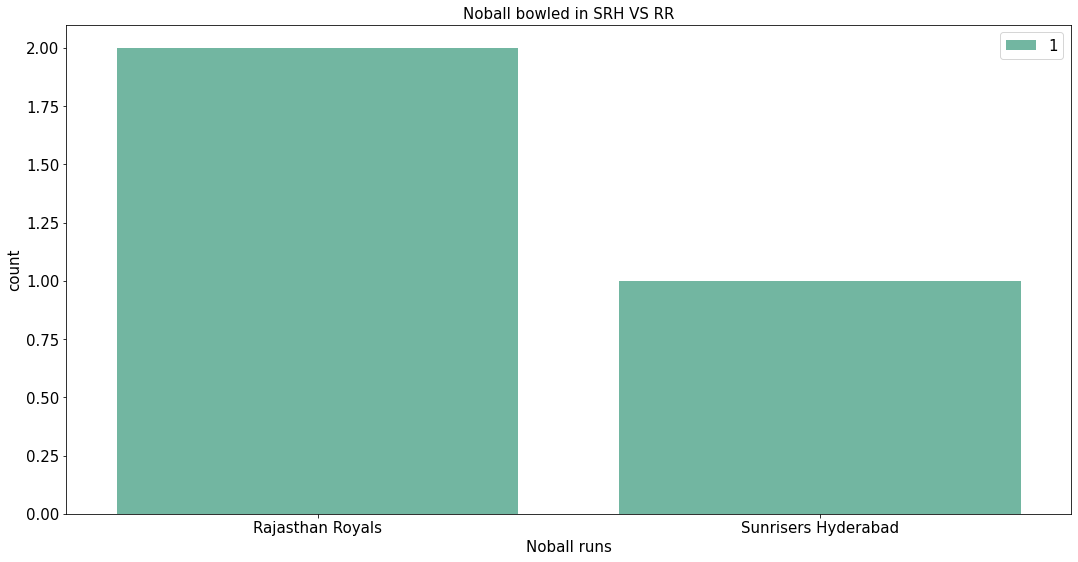

In [51]:
plt.figure(figsize = (18,9))
sns.countplot(nbcount['bowling_team'],palette='Set2',hue=nbcount['noball_runs'])
plt.title('Noball bowled in SRH VS RR',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Noball runs',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.legend(loc=1,fontsize=15)

plt.show()

This shows that very less no-balls are bowled in RR VS SRH matches . So, for today also we can predict the no ball count to be 0-1.